<a href="https://colab.research.google.com/github/RajaSubramanian10/Hypothesis-Testing/blob/main/T_Testing_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hypothesis Testing - T Test**

Perform Cricket Bowler Classification using kNN and Random Forest
Prove that there is significant difference between the model and also show the best model

*@Author: Dr. R. Raja Subramanian*

In [ ]:

# Scrap EspnCricInfo Bowlers data website
from bs4 import BeautifulSoup
import requests
import csv
flag=1
def scrapESPN(url,flag):
  headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.6778.205  Safari/537.36"
  }

  p = requests.get(url)
  soup = BeautifulSoup(p.content, 'html.parser')
  content = soup.find_all('tr', class_='data1')
  fields = ['Winner','Span','Mat','Inns','Balls','Runs','Wkts','BBI','BBM','Ave','Econ','SR','5','10','']

  itemfull = []
  for item in content:
    items = []
    playerdata=(item.find_all('td'))
    for i in playerdata:
      items.append(i.text)
    itemfull.append(items)

  with open("ESPNcricBowltats.csv", 'a') as csvfile:
      # creating a csv writer object
      csvwriter = csv.writer(csvfile)
      if(flag==1):
        csvwriter.writerow(fields)
        flag=0
      csvwriter.writerows(itemfull)


url1 = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;"
url2 = ""
url3 = "template=results;type=bowling"
url = url1+url2+url3
flag=1
scrapESPN(url,1)
for i in range(2,36):
  url2 = "page="+str(i)+";"
  url = url1+url2+url3
  print(url)
  scrapESPN(url,0)

https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=2;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=3;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=4;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=5;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=6;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=7;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=8;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=9;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=10;template=results;type=bowling
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;page=1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Read the dataset
data = pd.read_csv("ESPNcricBowltats.csv")
print(data.head())

# Preprocess
def discretizeOutput(y):
  for i in range(len(y)):
    if(y[i]<65):
      y[i] = 1
    else:
      y[i] = 0
  return y

# Separate features and target
y = data["SR"]
discretizeOutput(y)



Empty DataFrame
Columns: [Winner, Span, Mat, Inns, Balls, Runs, Wkts, BBI, BBM, Ave, Econ, SR, 5, 10, Unnamed: 14]
Index: []


,SR


In [ ]:
data

,Winner,Span,Mat,Inns,Balls,Runs,Wkts,BBI,BBM,Ave,Econ,SR,5,10,Unnamed: 14


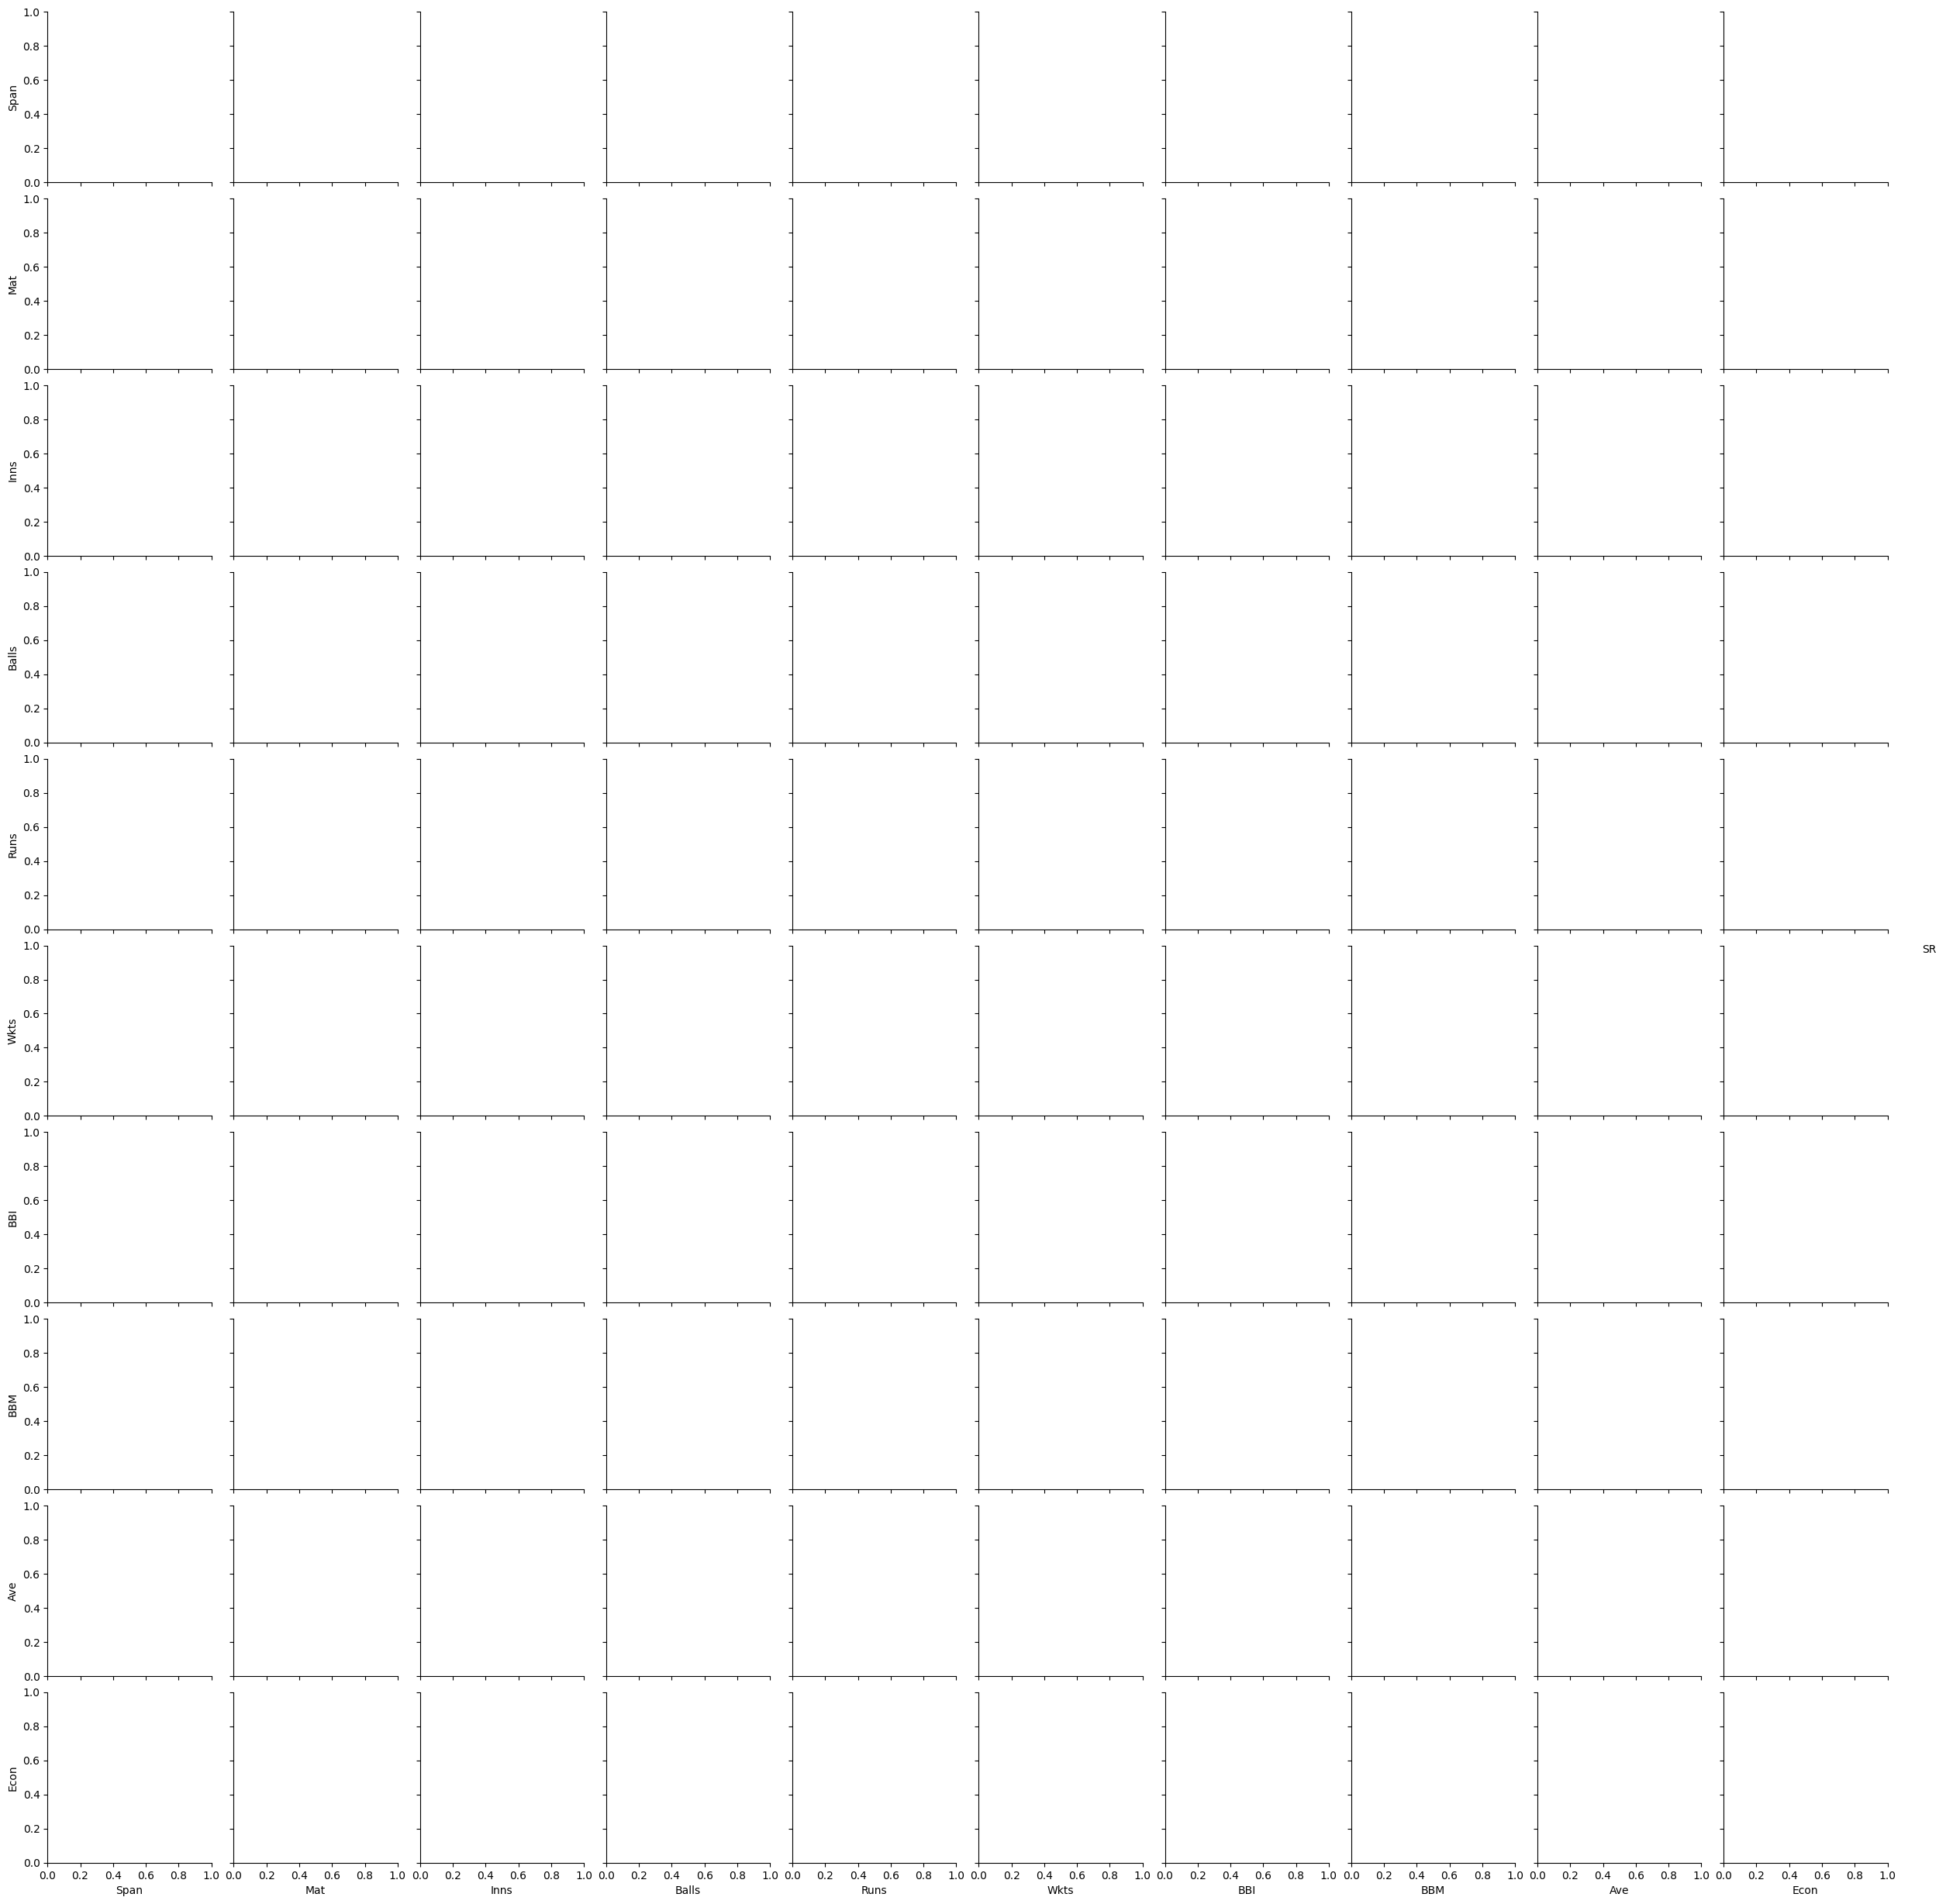

In [ ]:
import seaborn as sns

df = pd.DataFrame(data, columns=data.columns[1:12])
sns.pairplot(df,hue='SR')

In [ ]:
from sklearn.model_selection import train_test_split
x = df[['Ave','Econ']]
X_train, X_test, y_train, y_test = train_test_split(x,df['SR'],test_size=0.30)

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred1 = knn.predict(X_test)
sum(pred1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
sv = RandomForestClassifier(max_depth=1, random_state=0)
sv.fit(X_train,y_train)
pred2 = sv.predict(X_test)
sum(pred2)

In [ ]:
model1 = np.array(pred1)
model2 = np.array(pred2)
df1 = pd.DataFrame(model1)
df2 = pd.DataFrame(model2)
pd.concat([df1, df2], axis=1).to_csv('Performance11.csv', header=['Model1', 'Model2'])

In [ ]:
from scipy.stats import ttest_ind

perform_data = pd.read_csv("Performance11.csv")

model1 = perform_data[["Model1"]]
model2 = perform_data[["Model2"]]
# Perform t-test
t_statistic, p_value = ttest_ind(model1, model2)

# Print results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the accuracy of Model A and Model B.")
    if t_statistic>0:
      print("Model 1 is better than Model 2")
    else:
      print("Model 2 is better than Model 1")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the accuracy of Model A and Model B.")